<a href="https://colab.research.google.com/github/sedavasema/mohammad/blob/main/mnist_API_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## mnist by application programming interface

### تعریف توابع مورد نیاز

# تعریف تابع پلات

In [1]:
def plot_history(net_history):
  history=net_history.history

  losses=history['loss']
  val_losses=history['val_loss']

  accuracy=history['accuracy']
  val_accuracy=history['val_accuracy']
  
  plt.xlabel('epoches')
  plt.ylabel('losses')
  plt.plot(losses)
  plt.plot(val_losses)
  plt.legend(['loss','val_loss'])

  plt.figure()
  plt.xlabel('epoches')
  plt.ylabel('accuracy')
  plt.plot(accuracy)
  plt.plot(val_accuracy)
  plt.legend(['accuracy','val_accuracy'])


## mnist کار کردن با دیتا بیس 

In [2]:
import keras
import tensorflow
from keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt


In [3]:
(train_images, train_labels),(test_images,test_labels)=mnist.load_data()


11490434/11490434 [==============================] - 0s 0us/step


## شناخت داده لود شده

In [4]:
train_images.shape
train_images.ndim
train_images.dtype
print('train_image shape is: ' ,train_images.shape)
print('train_image dtype is: ' ,train_images.dtype)
print('train_images ndim is: ' ,train_images.ndim)

train_image shape is:  (60000, 28, 28)
train_image dtype is:  uint8
train_images ndim is:  3


## پیش پردازش داده

In [6]:
from keras.utils import np_utils


In [7]:
#در اینجا چون از ای پی آی وشبکه های سی ان ان استفاده میکنیم دیگر نیاز نیست داده را به وکتور تبدیل کرد فقط یک کانال رنگ به آن اضافه میکنیم
X_train=train_images.reshape(60000,28,28,1)
X_test=test_images.reshape(10000,28,28,1)
#چون میخواهیم داده ها را نرمال کنیم آنها را اعشاری میکنیم
X_train=X_train.astype('float32')
X_test=X_test.astype('float32')
X_train /=255
X_test /=255
#حال باید لیبل ها رو برای لایه سافت مکس آماده کنیم
Y_train=np_utils.to_categorical(train_labels)
Y_test=np_utils.to_categorical(test_labels)

# شبکه عصبی فولی کانکتد

## ساختن شبکه عصبی

In [19]:
, flatten
from keras.backend import dropout
from keras.models import Model
#from keras.layers import Input,Conv2D,MaxPool2D,Flatten,Dense
#روش دیگر استفاده از لایه ها
from keras import layers
myInput=layers.Input(shape=(28,28,1))
Conv1=layers.Conv2D(16,(3,3),activation='relu',padding='same')(myInput)
Pool1=layers.MaxPool2D(pool_size=(2,2))(Conv1)
#وقتی سایز داده ها را با پول نصف میکنیم میتوان تعداد فیچر ها را زیاد کرد
Conv2=layers.Conv2D(32,(3,3),activation='relu',padding='same')(Pool1)
Pool2=layers.MaxPool2D(pool_size=(2,2))(Conv2)
flat=layers.Flatten()(Pool2)
Out_layer=layers.Dense(10,activation='softmax')(flat)

myModel=Model(myInput,Out_layer)

In [15]:
myModel.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_6 (Conv2D)           (None, 28, 28, 16)        160       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 14, 14, 16)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 14, 14, 32)        4640      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 7, 7, 32)         0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 1568)              0   

## کامپایل کردن وآموزش شبکه عصبی

In [21]:
#یک روش دیگر فراخوانی توابع اپتیمایزر و لاس فانکشن
#from keras.optimizers import SGD
#from keras.losses import categorical_crossentropy
import keras
myModel.compile(optimizer=keras.optimizers.Adam(),loss=keras.losses.CategoricalCrossentropy(),metrics=['accuracy'])

network_history=myModel.fit(X_train,Y_train,batch_size=128,epochs=5,validation_split=0.2)



Epoch 1/20
375/375 [==============================] - 57s 150ms/step - loss: 0.3877 - accuracy: 0.8878 - val_loss: 0.1244 - val_accuracy: 0.9631
Epoch 2/20
375/375 [==============================] - 55s 146ms/step - loss: 0.0975 - accuracy: 0.9709 - val_loss: 0.0784 - val_accuracy: 0.9764
Epoch 3/20
375/375 [==============================] - 54s 145ms/step - loss: 0.0698 - accuracy: 0.9783 - val_loss: 0.0632 - val_accuracy: 0.9825
Epoch 4/20
375/375 [==============================] - 50s 134ms/step - loss: 0.0559 - accuracy: 0.9834 - val_loss: 0.0655 - val_accuracy: 0.9809
Epoch 5/20
375/375 [==============================] - 56s 149ms/step - loss: 0.0493 - accuracy: 0.9850 - val_loss: 0.0537 - val_accuracy: 0.9834
Epoch 6/20
375/375 [==============================] - 53s 141ms/step - loss: 0.0429 - accuracy: 0.9867 - val_loss: 0.0505 - val_accuracy: 0.9847
Epoch 7/20
375/375 [==============================] - 55s 148ms/step - loss: 0.0379 - accuracy: 0.9881 - val_loss: 0.0507 - val_ac

In [22]:
history=network_history.history
history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

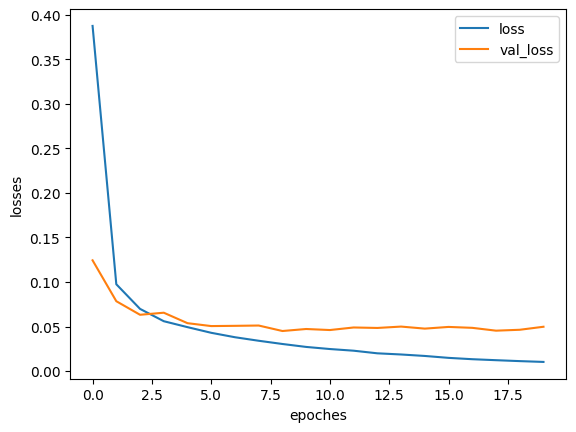

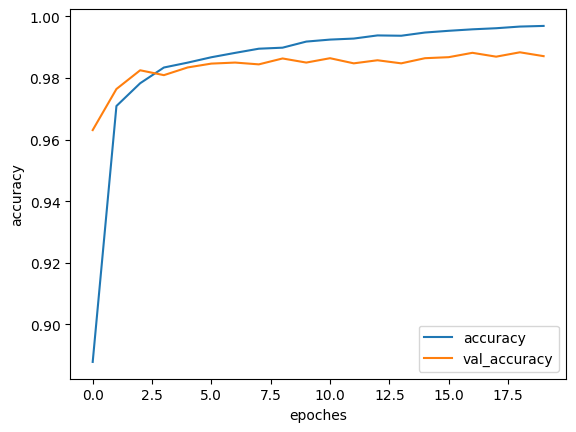

In [23]:
plot_history(network_history)

## ارزیابی مدل با داده های تست

In [ ]:
test_loss,test_accu=myModel.evaluate(X_test,Y_test)

313/313 [==============================] - 2s 5ms/step - loss: 0.4240 - accuracy: 0.8902


## پیشگویی مدل

In [ ]:
test_label_p=myModel.predict(X_test)

313/313 [==============================] - 1s 3ms/step


# مقدار پیشگویی شده با همان فرمت سافت مکس است ان را تبدیل میکنیم به مقدار شبیه ورودی

In [ ]:
#axis=1 یعنی روی سطرها نگاه کن و دنبال ماکسیمم بگرد
#axis=0 یعنی روی ستون ها بگرد
test_label_pt=np.argmax(test_label_p,axis=1)

In [ ]:
myModel.layers[0].name

'dense_9'

In [ ]:
myModel.layers[0].get_config()

{'name': 'dense_9',
 'trainable': True,
 'dtype': 'float32',
 'batch_input_shape': (None, 784),
 'units': 500,
 'activation': 'relu',
 'use_bias': True,
 'kernel_initializer': {'class_name': 'GlorotUniform',
  'config': {'seed': None}},
 'bias_initializer': {'class_name': 'Zeros', 'config': {}},
 'kernel_regularizer': None,
 'bias_regularizer': None,
 'activity_regularizer': None,
 'kernel_constraint': None,
 'bias_constraint': None}